# Problem Statement

### Memperkirakan harga tiket penumpang titanic berdasarkan umur (Regression), dan klasifikasi survived atau tidak berdasar umur (Clasification). Data yang digunakan adalah data penumpang kapal titanic. Tujuannya (1)memprediksi harga tiket dari umur yang diketahui, ini bisa untuk mengetahui apakah ada hubungan antara umur dan jenis atau harga tiket yang dibeli. (2) melakukan klasifikasi berdasrkan data survived dan umur.

# 1. Regression

## 1.a Impor Pustaka

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## 1.b  EDA

In [3]:
df = pd.read_csv(r'C:\Users\user\Latihan1\kapal_titanic.csv')

In [4]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [5]:
df.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
881,0,3,male,33.0,0,0,7.8958,S,NaN
882,0,3,female,22.0,0,0,10.5167,S,NaN
883,0,2,male,28.0,0,0,10.5000,S,NaN
884,0,3,male,25.0,0,0,7.0500,S,NaN
885,0,3,female,39.0,0,5,29.1250,Q,NaN
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C
890,0,3,male,32.0,0,0,7.7500,Q,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.c  Persiapan Data (Pembuatan dua kolom data dan menghapus NaN)

In [8]:
df2 = df[['age','fare']]

In [9]:
df2

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [10]:
df3 = df2.dropna()

In [11]:
df3

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [12]:
A=df3['age']
F=df3['fare']

In [13]:
A2=np.array(A).reshape(-1,1)
F2=np.array(F).reshape(-1,1)

In [14]:
print('data age:',A2)
print('shape data age:',A2.shape)
print('data harga',F2)
print('shape data harga:',F2.shape)

data age: [[22.  ]
 [38.  ]
 [26.  ]
 [35.  ]
 [35.  ]
 [54.  ]
 [ 2.  ]
 [27.  ]
 [14.  ]
 [ 4.  ]
 [58.  ]
 [20.  ]
 [39.  ]
 [14.  ]
 [55.  ]
 [ 2.  ]
 [31.  ]
 [35.  ]
 [34.  ]
 [15.  ]
 [28.  ]
 [ 8.  ]
 [38.  ]
 [19.  ]
 [40.  ]
 [66.  ]
 [28.  ]
 [42.  ]
 [21.  ]
 [18.  ]
 [14.  ]
 [40.  ]
 [27.  ]
 [ 3.  ]
 [19.  ]
 [18.  ]
 [ 7.  ]
 [21.  ]
 [49.  ]
 [29.  ]
 [65.  ]
 [21.  ]
 [28.5 ]
 [ 5.  ]
 [11.  ]
 [22.  ]
 [38.  ]
 [45.  ]
 [ 4.  ]
 [29.  ]
 [19.  ]
 [17.  ]
 [26.  ]
 [32.  ]
 [16.  ]
 [21.  ]
 [26.  ]
 [32.  ]
 [25.  ]
 [ 0.83]
 [30.  ]
 [22.  ]
 [29.  ]
 [28.  ]
 [17.  ]
 [33.  ]
 [16.  ]
 [23.  ]
 [24.  ]
 [29.  ]
 [20.  ]
 [46.  ]
 [26.  ]
 [59.  ]
 [71.  ]
 [23.  ]
 [34.  ]
 [34.  ]
 [28.  ]
 [21.  ]
 [33.  ]
 [37.  ]
 [28.  ]
 [21.  ]
 [38.  ]
 [47.  ]
 [14.5 ]
 [22.  ]
 [20.  ]
 [17.  ]
 [21.  ]
 [70.5 ]
 [29.  ]
 [24.  ]
 [ 2.  ]
 [21.  ]
 [32.5 ]
 [32.5 ]
 [54.  ]
 [12.  ]
 [24.  ]
 [45.  ]
 [33.  ]
 [20.  ]
 [47.  ]
 [29.  ]
 [25.  ]
 [23.  ]
 [19.  ]
 [37.  ]


## 1.d Definisi Model

In [15]:
model_harga_tiket = LinearRegression().fit(A2,F2)
model_harga_tiket

LinearRegression()

In [16]:
#a = int(input("Masukan umur penumpang: "))
#print("Umur:",a)

Masukan umur penumpang: 45
Umur: 45


In [17]:
ukuran_umur_baru = np.array([34]).reshape((-1,1))
harga_tiket_baru = model_harga_tiket.predict(ukuran_umur_baru)
print('ukuran umur baru:',ukuran_umur_baru)
print('harga tiket baru:',harga_tiket_baru)

ukuran umur baru: [[34]]
harga tiket baru: [[36.19966663]]


In [18]:
harga_tiket_prediksi = model_harga_tiket.predict(ukuran_umur_baru)

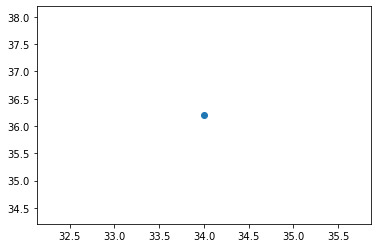

In [19]:
plt.plot(ukuran_umur_baru,harga_tiket_prediksi)
plt.scatter(ukuran_umur_baru,harga_tiket_prediksi)

plt.show()

## 1.e Perfomance Model

In [20]:
performance_model = model_harga_tiket.score(A2,F2)
print('performance model harga tiket:',performance_model)

performance model harga tiket: 0.009228809267447624


In [21]:
error = np.mean(harga_tiket_prediksi - F2)**2
print('error model harga tiket:',error)

error model harga tiket: 2.26548441847318


In [22]:
coef_model_harga_tiket = model_harga_tiket.coef_
constant_model_harga_tiket = model_harga_tiket.intercept_
print('a koef model harga rumah:',coef_model_harga_tiket)
print('b konst  model harga rumah', constant_model_harga_tiket)

a koef model harga rumah: [[0.34996368]]
b konst  model harga rumah [24.30090145]


# 2. Classification dengan Confusion Matrix

## 2.a Data Preparation

In [23]:
df = pd.read_csv(r'C:\Users\user\Latihan1\kapal_titanic.csv')

In [24]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [25]:
df2 = df[['age','survived']]

In [26]:
df3 = df2.dropna()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
S2=df3['age']
T2=df3['survived']

In [29]:
S3=np.array(S2).reshape(-1,1)
T3=np.array(T2).reshape(-1,1)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
model_tebak_survived = LogisticRegression().fit(S3,T3)
model_tebak_survived

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [33]:
#harga_tiket_prediksi = model_harga_tiket.predict(ukuran_umur_baru)
tebak_survived_prediksi = model_tebak_survived.predict(S3)
tebak_survived_prediksi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
tebak_survived_prediksi_prob = model_tebak_survived.predict_proba(S3)
tebak_survived_prediksi_prob

array([[0.57393445, 0.42606555],
       [0.61617063, 0.38382937],
       [0.58462113, 0.41537887],
       ...,
       [0.5658733 , 0.4341267 ],
       [0.58462113, 0.41537887],
       [0.60050012, 0.39949988]])

In [35]:
performance_model_tebak_survived = model_tebak_survived.score(S3,T3)
print('performance model tebak survived:',performance_model_tebak_survived)
cof_model_tebak_survived = model_tebak_survived.coef_
constant_model_tebak_survived = model_tebak_survived.intercept_
print('coefficient dari model tebak survivedt:',cof_model_tebak_survived)
print('konstan model tebak survived:',constant_model_tebak_survived)

performance model tebak survived: 0.5938375350140056
coefficient dari model tebak survivedt: [[-0.01096274]]
konstan model tebak survived: [-0.05674173]


In [107]:
confusion_matrix(T3,tebak_survived_prediksi)

array([[424,   0],
       [290,   0]], dtype=int64)

In [36]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [37]:
hasil_confusion_matrik_survived = confusion_matrix(T3,tebak_survived_prediksi)
hasil_confusion_matrik_survived

array([[424,   0],
       [290,   0]], dtype=int64)

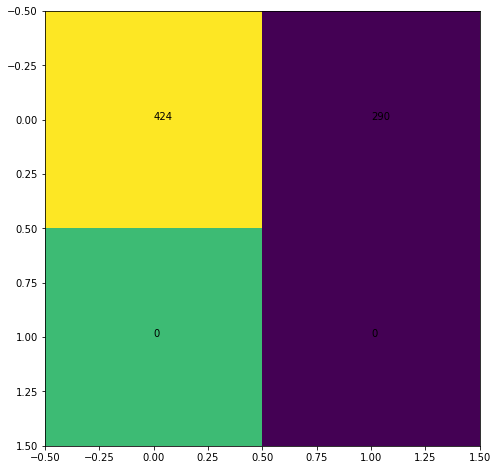

In [38]:
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(hasil_confusion_matrik_survived)
ax.grid(False)
for i in range(2):
    for j in range(2):
        ax.text(j,i,hasil_confusion_matrik_survived[j,i])
plt.show()

In [55]:
import pickle
pickle.dump(model_tebak_survived,open('./model_classification.pkl','wb'))

In [56]:
import pickle
model_tebak_survive = pickle.load(open('./model_classification.pkl','rb'))

In [57]:
model_tebak_survive.predict(np.array([10]).reshape(1,-1))

array([0], dtype=int64)